In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [ ]:
def draw_comp(title, algo_str, str_100, str_200, str_400, str_700, yeary_thing=False):
  with open(algo_str) as algo_file:
    backtest = json.load(algo_file)
  algo_equity_charts = backtest["Charts"]["Strategy Equity"]
  algo_equity_series = algo_equity_charts["Series"]["Equity"]["Values"]
  algo_chart = pd.json_normalize(algo_equity_series)
  algo_chart.rename(columns={'x': 'Time', 'y': 'Equity'}, inplace=True)
  algo_chart['Time'] = pd.to_datetime(algo_chart['Time'], unit='s')

  with open(str_100) as str_100_file:
    backtest = json.load(str_100_file)
  str_100_equity_charts = backtest["Charts"]["Strategy Equity"]
  str_100_equity_series = str_100_equity_charts["Series"]["Equity"]["Values"]
  str_100_chart = pd.json_normalize(str_100_equity_series)
  str_100_chart.rename(columns={'x': 'Time', 'y': 'Equity'}, inplace=True)
  str_100_chart['Time'] = pd.to_datetime(str_100_chart['Time'], unit='s')

  with open(str_200) as str_200_file:
    backtest = json.load(str_200_file)
  str_200_equity_charts = backtest["Charts"]["Strategy Equity"]
  str_200_equity_series = str_200_equity_charts["Series"]["Equity"]["Values"]
  str_200_chart = pd.json_normalize(str_200_equity_series)
  str_200_chart.rename(columns={'x': 'Time', 'y': 'Equity'}, inplace=True)

  with open(str_400) as str_400_file:
    backtest = json.load(str_400_file)
  str_400_equity_charts = backtest["Charts"]["Strategy Equity"]
  str_400_equity_series = str_400_equity_charts["Series"]["Equity"]["Values"]
  str_400_chart = pd.json_normalize(str_400_equity_series)
  str_400_chart.rename(columns={'x': 'Time', 'y': 'Equity'}, inplace=True)

  with open(str_700) as str_700_file:
    backtest = json.load(str_700_file)
  str_700_equity_charts = backtest["Charts"]["Strategy Equity"]
  str_700_equity_series = str_700_equity_charts["Series"]["Equity"]["Values"]
  str_700_chart = pd.json_normalize(str_700_equity_series)
  str_700_chart.rename(columns={'x': 'Time', 'y': 'Equity'}, inplace=True)

  fig = plt.figure(figsize=(16, 6))
  plt.title(title, fontsize=20)
  plt.plot(algo_chart['Time'], algo_chart['Equity'], label='with algo')
  plt.plot(str_100_chart['Time'], str_100_chart['Equity'], alpha=0.7, label='buy-and-hold 100 shares')
  plt.plot(str_100_chart['Time'], str_200_chart['Equity'], alpha=0.7, label='buy-and-hold 200 shares')
  plt.plot(str_100_chart['Time'], str_400_chart['Equity'], alpha=0.7, label='buy-and-hold 400 shares')
  plt.plot(str_100_chart['Time'], str_700_chart['Equity'], alpha=0.7, label='buy-and-hold 700 shares')

  plt.axhline(y = 1100000, color='grey', linestyle='--', alpha=0.5)
  plt.axhline(y = 1000000, color='grey', linestyle='--', alpha=0.5)
  plt.axhline(y = 900000, color='grey', linestyle='--', alpha=0.5)

  for i, date in enumerate(algo_chart['Time']):
    if date.day == 1:
      if algo_chart['Time'].iloc[i - 1].day > 28:
        plt.axvline(date, linestyle=':', color='purple', alpha=0.2)

  if yeary_thing:
    plt_max = max(max(algo_chart['Equity']), max(str_700_chart['Equity']))
    plt_min = min(min(algo_chart['Equity']), max(str_700_chart['Equity']))
    y = [plt_min, plt_max]
    plt.fill_betweenx(y, pd.to_datetime('2021-04-01'), pd.to_datetime('2021-08-30'), alpha=0.1, color='g', label='summer')
    plt.fill_betweenx(y, pd.to_datetime('2021-10-01'), pd.to_datetime('2022-01-30'), alpha=0.1, color='y', label='winter')
    plt.fill_betweenx(y, pd.to_datetime('2022-04-01'), pd.to_datetime('2022-04-30'), alpha=0.1, color='r', label='april')

  print('Total algo: ', int(algo_chart['Equity'].iloc[-1]), ' - ', int(algo_chart['Equity'].iloc[0]), 
        ' = ', int(algo_chart['Equity'].iloc[-1]) - int(algo_chart['Equity'].iloc[0]))
  print('Total 700:  ', int(str_700_chart['Equity'].iloc[-1]), ' - ', int(str_700_chart['Equity'].iloc[0]), 
        ' = ', int(str_700_chart['Equity'].iloc[-1]) - int(str_700_chart['Equity'].iloc[0]))
  
  plt.xlabel('Date')
  plt.ylabel('Equity, $')
  plt.legend()
  plt.show()

Total algo:  2486548  -  1000000  =  1486548
Total 700:   1563867  -  1000000  =  563867


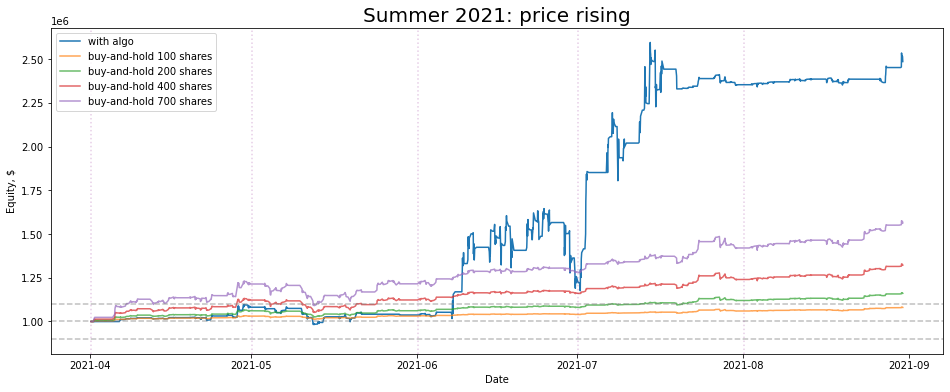

In [ ]:
draw_comp("Summer 2021: price rising", "summer_algo.json", "summer_100.json", "summer_200.json", "summer_400.json", "summer_700.json")

Total algo:  967838  -  1000000  =  -32162
Total 700:   659895  -  1000000  =  -340105


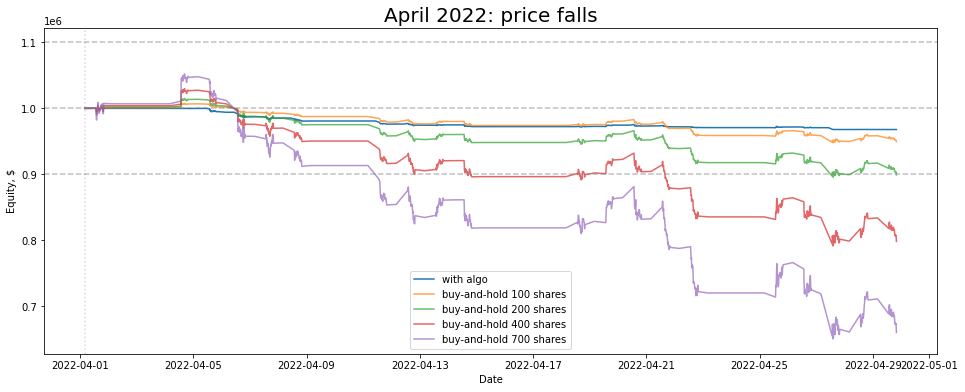

In [ ]:
draw_comp("April 2022: price falls", "apr_algo.json", "apr_100.json", "apr_200.json", "apr_400.json", "apr_700.json")

Total algo:  1187193  -  1000000  =  187193
Total 700:   990882  -  1000000  =  -9118


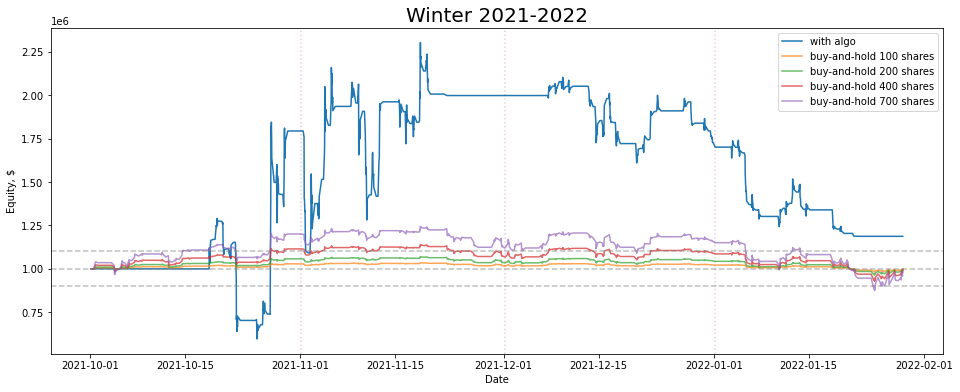

In [ ]:
draw_comp("Winter 2021-2022", "winter_algo.json", "winter_100.json", "winter_200.json", "winter_400.json", "winter_700.json")

Total algo:  409356  -  1000000  =  -590644
Total 700:   1136825  -  1000000  =  136825


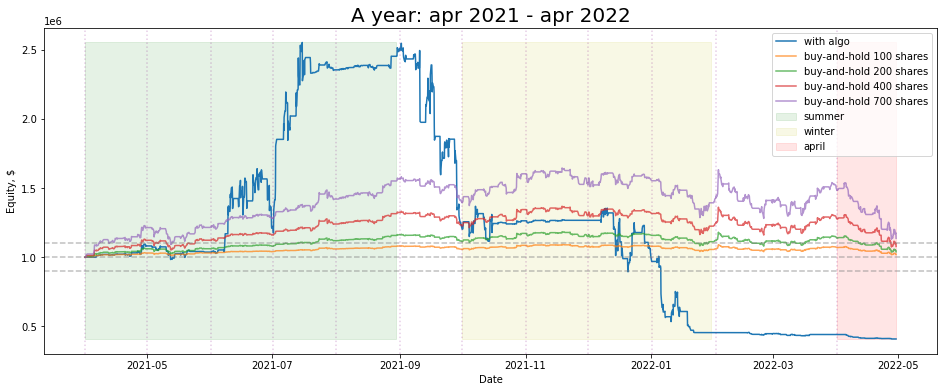

In [ ]:
draw_comp("A year: apr 2021 - apr 2022", "whole_algo.json", "whole_100.json", "whole_200.json", "whole_400.json", "whole_700.json", True)

**Подозрение:** стоит обучать модель почаще. В первые полгода после обучения работает сильно лучше